In [1]:
import time
import tracemalloc
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
def generate_uniform_2class_dataset(N: int, D: int, test_size: float = 0.2, random_state: int = 42):
    """
    Generates a complex 2-class classification dataset with uniform distribution of class labels and added noise,
    then splits it into training and testing sets.

    Parameters:
        N: int - Total number of data points.
        D: int - Number of features (dimensions).
        test_size: float - Proportion of the dataset to include in the test split.
        random_state: int - Seed for reproducibility.

    Returns:
        X_train: Training feature set.
        X_test: Testing feature set.
        y_train: Training labels (0 or 1).
        y_test: Testing labels (0 or 1).
    """
    np.random.seed(random_state)

    # Generate data points from a single distribution with added noise
    X = np.random.normal(loc=0, scale=3, size=(N, D))  # Wider spread to increase overlap
    noise = np.random.normal(loc=0, scale=1, size=X.shape)
    X += noise  # Add noise for complexity

    # Randomly assign class labels (0 or 1) in equal proportions
    y = np.random.choice([0, 1], size=N)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test




In [3]:
# Example usage
N = 100
D = 2
X_train, X_test, y_train, y_test = generate_uniform_2class_dataset(N, D)

In [4]:
X_train[:5],y_train[:5], X_test[:5],y_test[:5]

(array([[-5.97399485,  1.01923523],
        [ 0.91132631,  4.54394424],
        [ 0.0913902 ,  2.86749413],
        [-0.29244743, -3.45735893],
        [ 2.85348311, -4.2563175 ]]),
 array([1, 1, 1, 1, 0]),
 array([[ 2.69027296,  5.70297135],
        [ 6.9362226 , -0.06783795],
        [-0.13984059,  4.16511547],
        [ 0.0831104 ,  2.41293404],
        [-1.30828874,  0.91710278]]),
 array([0, 1, 0, 1, 1]))

In [5]:
import matplotlib.pyplot as plt

def plot_2class_data(X_train, y_train, X_test, y_test, title="2-Class Dataset with Query Points"):
    """
    Plots a 2-class dataset for training and testing sets, treating the testing set as query points.

    Parameters:
        X_train: Training feature set, shape (N_train, 2) for 2D plotting.
        y_train: Training labels (0 or 1).
        X_test: Testing feature set, shape (N_test, 2), treated as query points.
        y_test: Testing labels (0 or 1).
        title: Title of the plot.
    """
    plt.figure(figsize=(8, 6))

    # Plot training data points for each class
    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0 (Train)', alpha=0.6)
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='green', label='Class 1 (Train)', alpha=0.6)

    # Plot testing data points for each class (treated as query points)
    plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='purple', marker='*', s=200, label='Class 0 (Test/Query)')
    plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='orange', marker='*', s=200, label='Class 1 (Test/Query)')

    # Customize plot
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True)
    plt.show()



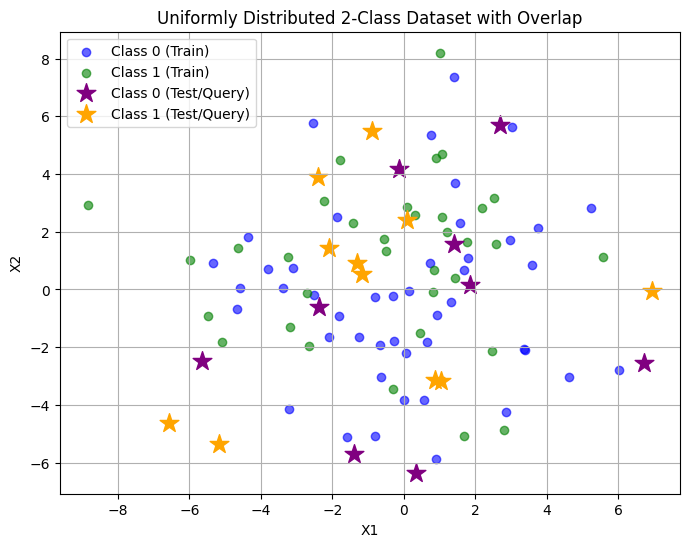

In [6]:

plot_2class_data(X_train, y_train, X_test, y_test, title="Uniformly Distributed 2-Class Dataset with Overlap")

Naive Version of KNN

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import time
import tracemalloc
import numpy as np
from collections import Counter

def naive_knn_classification(X_train, y_train, X_test, y_test, k):
    """
    Performs k-NN classification using the Naive approach, logging performance and metrics.

    Parameters:
        X_train: Training feature set.
        y_train: Training labels.
        X_test: Testing feature set.
        y_test: Testing labels.
        k: Number of neighbors to find.

    Returns:
        Dictionary of metrics including training and testing time, memory usage, accuracy, precision, recall, and F1-score.
    """
    metrics = {
        'train_time': 0,
        'train_memory': 0,
        'test_time': 0,
        'test_memory': 0,
        'accuracy': None,
        'precision': None,
        'recall': None,
        'f1_score': None
    }

    ### Training Phase (minimal for Naive k-NN)
    tracemalloc.start()
    start_time = time.time()
    metrics['train_time'] = time.time() - start_time
    metrics['train_memory'] = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    ### Testing Phase
    y_pred = []  # Collect predictions for each test sample

    # Finding neighbors
    start_time = time.time()
    tracemalloc.start()

    for query in X_test:
        distances = np.linalg.norm(X_train - query, axis=1)
        nearest_indices = np.argsort(distances)[:k]

        # Prediction (based on neighbor labels)
        neighbor_labels = y_train[nearest_indices]
        predicted_label = Counter(neighbor_labels).most_common(1)[0][0]  # Majority vote
        y_pred.append(predicted_label)

    metrics['test_time'] = time.time() - start_time
    metrics['test_memory'] = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    # Calculate Accuracy and Other Metrics
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['precision'] = precision_score(y_test, y_pred, zero_division=0)
    metrics['recall'] = recall_score(y_test, y_pred, zero_division=0)
    metrics['f1_score'] = f1_score(y_test, y_pred, zero_division=0)

    return metrics


In [8]:
k=5
metrics_naive = naive_knn_classification(X_train, y_train, X_test, y_test, k)
metrics_naive

{'train_time': 2.1457672119140625e-06,
 'train_memory': 0,
 'test_time': 0.002835988998413086,
 'test_memory': 20426,
 'accuracy': 0.65,
 'precision': 0.75,
 'recall': 0.5454545454545454,
 'f1_score': 0.631578947368421}

LSH:

In [9]:
def lsh_knn_classification(X_train, y_train, X_test, y_test, k, P=5, random_state=42):
    """
    Performs k-NN classification using Locality Sensitive Hashing (LSH) with performance logging.

    Parameters:
        X_train: Training feature set.
        y_train: Training labels.
        X_test: Testing feature set (used as query points).
        y_test: Testing labels.
        k: Number of neighbors to find.
        P: Number of random projections (hyperplanes) for LSH.
        random_state: Seed for reproducibility.

    Returns:
        Dictionary of metrics including training and testing time, memory usage, and accuracy.
        Also returns the random projection matrix R for optional plotting.
    """
    np.random.seed(random_state)
    metrics = {
        'train_time': 0,
        'train_memory': 0,
        'test_time': 0,
        'test_memory': 0,
        'accuracy': None
    }

    ### Training Phase (Setting up LSH Projections)
    tracemalloc.start()
    start_time = time.time()

    # Add a bias dimension to support projecting across origin hyperplanes
    X_train_aug = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

    # Generate random hyperplanes (P projections)
    R = np.random.randn(X_train_aug.shape[1], P)

    # Project training data onto hyperplanes
    train_projections = np.sign(X_train_aug @ R)

    metrics['train_time'] = time.time() - start_time
    metrics['train_memory'] = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    ### Testing Phase (Neighbor Search + Prediction)
    correct_predictions = 0
    test_neighbors = []

    # Augment test data with bias dimension
    X_test_aug = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

    # Finding neighbors
    start_time = time.time()
    tracemalloc.start()

    for i, query in enumerate(X_test_aug):
        # Project query point onto hyperplanes
        query_projection = np.sign(query @ R)

        # Calculate Hamming distance between query and each training projection
        hamming_distances = np.sum(train_projections != query_projection, axis=1)
        nearest_indices = np.argsort(hamming_distances)[:k]
        test_neighbors.append(nearest_indices)

    metrics['test_time'] = time.time() - start_time
    metrics['test_memory'] = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    # Prediction and accuracy calculation
    for i, indices in enumerate(test_neighbors):
        neighbor_labels = y_train[indices]
        predicted_label = Counter(neighbor_labels).most_common(1)[0][0]
        if predicted_label == y_test[i]:
            correct_predictions += 1

    metrics['accuracy'] = correct_predictions / len(y_test) if len(y_test) > 0 else None

    return metrics, R


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import time
import tracemalloc
import numpy as np
from collections import Counter

def lsh_knn_classification(X_train, y_train, X_test, y_test, k, P=5, random_state=42):
    """
    Performs k-NN classification using Locality Sensitive Hashing (LSH) with performance logging.

    Parameters:
        X_train: Training feature set.
        y_train: Training labels.
        X_test: Testing feature set (used as query points).
        y_test: Testing labels.
        k: Number of neighbors to find.
        P: Number of random projections (hyperplanes) for LSH.
        random_state: Seed for reproducibility.

    Returns:
        Dictionary of metrics including training and testing time, memory usage, accuracy, precision, recall, and F1-score.
        Also returns the random projection matrix R for optional plotting.
    """
    np.random.seed(random_state)
    metrics = {
        'train_time': 0,
        'train_memory': 0,
        'test_time': 0,
        'test_memory': 0,
        'accuracy': None,
        'precision': None,
        'recall': None,
        'f1_score': None
    }

    ### Training Phase (Setting up LSH Projections)
    tracemalloc.start()
    start_time = time.time()

    # Add a bias dimension to support projecting across origin hyperplanes
    X_train_aug = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

    # Generate random hyperplanes (P projections)
    R = np.random.randn(X_train_aug.shape[1], P)

    # Project training data onto hyperplanes
    train_projections = np.sign(X_train_aug @ R)

    metrics['train_time'] = time.time() - start_time
    metrics['train_memory'] = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    ### Testing Phase (Neighbor Search + Prediction)
    y_pred = []  # Collect predictions for each test sample
    test_neighbors = []

    # Augment test data with bias dimension
    X_test_aug = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

    # Finding neighbors
    start_time = time.time()
    tracemalloc.start()

    for query in X_test_aug:
        # Project query point onto hyperplanes
        query_projection = np.sign(query @ R)

        # Calculate Hamming distance between query and each training projection
        hamming_distances = np.sum(train_projections != query_projection, axis=1)
        nearest_indices = np.argsort(hamming_distances)[:k]
        test_neighbors.append(nearest_indices)

        # Prediction (based on neighbor labels)
        neighbor_labels = y_train[nearest_indices]
        predicted_label = Counter(neighbor_labels).most_common(1)[0][0]  # Majority vote
        y_pred.append(predicted_label)

    metrics['test_time'] = time.time() - start_time
    metrics['test_memory'] = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    # Calculate Accuracy and Other Metrics
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['precision'] = precision_score(y_test, y_pred, zero_division=0)
    metrics['recall'] = recall_score(y_test, y_pred, zero_division=0)
    metrics['f1_score'] = f1_score(y_test, y_pred, zero_division=0)

    return metrics, R


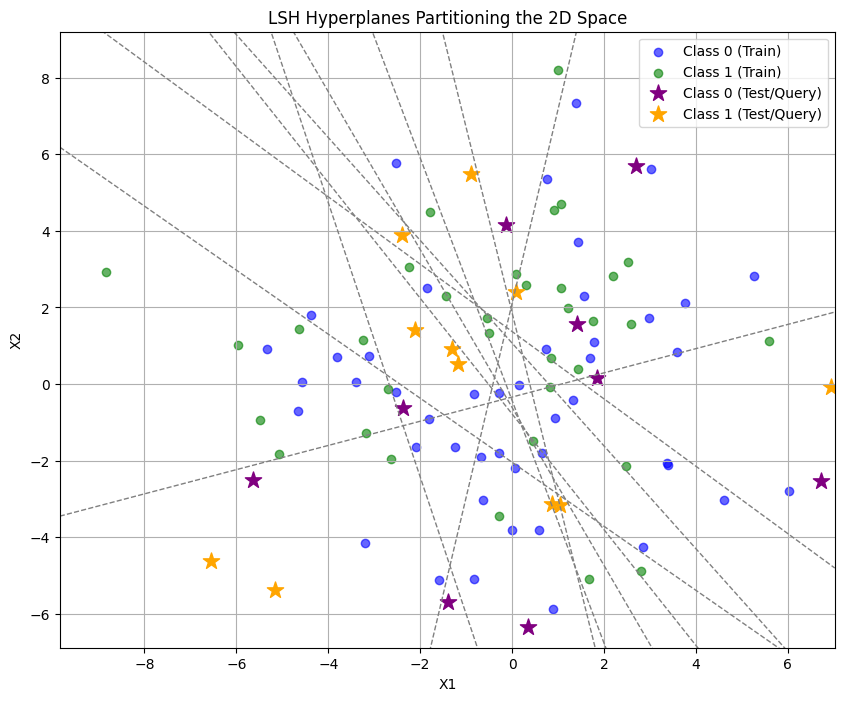

{'train_time': 0.0003142356872558594,
 'train_memory': 15344,
 'test_time': 0.0028717517852783203,
 'test_memory': 33800,
 'accuracy': 0.6,
 'precision': 0.8,
 'recall': 0.36363636363636365,
 'f1_score': 0.5}

In [11]:

def plot_lsh_hyperplanes(X_train, y_train, X_test, y_test, R, P):
    """
    Plots the LSH hyperplanes for visualization in 2D space.

    Parameters:
        X_train: Training feature set.
        y_train: Training labels.
        X_test: Testing feature set.
        y_test: Testing labels.
        R: Random projection matrix for LSH hyperplanes.
        P: Number of random projections (hyperplanes).
    """
    plt.figure(figsize=(10, 8))
    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0 (Train)', alpha=0.6)
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='green', label='Class 1 (Train)', alpha=0.6)
    plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='purple', marker='*', s=150, label='Class 0 (Test/Query)')
    plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='orange', marker='*', s=150, label='Class 1 (Test/Query)')

    # Plot each hyperplane as a line in 2D
    for i in range(P):
        x1_vals = np.array([X_train[:, 0].min() - 1, X_train[:, 0].max() + 1])
        x2_vals = (-R[0, i] - R[1, i] * x1_vals) / R[2, i]
        plt.plot(x1_vals, x2_vals, linestyle="--", linewidth=1, color='gray')

    # Customize plot with axis limits for better visualization
    plt.title("LSH Hyperplanes Partitioning the 2D Space")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.xlim(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1)
    plt.ylim(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Example usage
metrics_lsh, R = lsh_knn_classification(X_train, y_train, X_test, y_test, k=5, P=10)
plot_lsh_hyperplanes(X_train, y_train, X_test, y_test, R, P=10)
metrics_lsh


KD Tress:

In [12]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from collections import Counter
import tracemalloc
import time

# Define the KDTreeNode class with list of points and labels for each node
class KDTreeNode:
    def __init__(self, points=None, labels=None, axis=0, median_value=None, left=None, right=None, k=5):
        self.points = points  # List of points in the node (only for leaf nodes)
        self.labels = labels  # List of labels corresponding to points (only for leaf nodes)
        self.axis = axis      # Axis for the current split (0 for x, 1 for y)
        self.median_value = median_value  # Store median value for splitting at internal nodes
        self.left = left      # Left subtree
        self.right = right    # Right subtree
        self.is_leaf = points is not None and len(points) <= k  # Leaf if points are <= k

# Function to build the k-d tree based on the custom logic
def build_custom_kd_tree(points, labels, k, depth=0):
    # Base case: if the number of points is <= k, create a leaf node
    if points is None or len(points) <= k:
        return KDTreeNode(points=points, labels=labels, axis=depth % 2, k=k)

    # Select axis based on depth
    axis = depth % 2

    # Find median and condition to split points
    median_value = np.median(points[:, axis])
    left_indices = points[:, axis] < median_value
    right_indices = points[:, axis] >= median_value

    # Split points based on the condition
    left_points, left_labels = points[left_indices], labels[left_indices]
    right_points, right_labels = points[right_indices], labels[right_indices]

    # Create node with median value and recursively split left and right branches if necessary
    node = KDTreeNode(points=None, labels=None, axis=axis, median_value=median_value, k=k)
    node.left = build_custom_kd_tree(left_points, left_labels, k, depth + 1) if len(left_points) > 0 else None
    node.right = build_custom_kd_tree(right_points, right_labels, k, depth + 1) if len(right_points) > 0 else None

    return node

# Recursive k-NN search function for the k-d tree
def knn_search_kd_tree(node, query, k):
    if node is None:
        return []

    # If it's a leaf node, calculate distances to all points in the leaf
    if node.is_leaf:
        distances = [(np.linalg.norm(query - point), label) for point, label in zip(node.points, node.labels)]
        return sorted(distances, key=lambda x: x[0])[:k]

    # Otherwise, navigate the tree using median_value for splitting
    axis = node.axis
    next_branch = node.left if query[axis] < node.median_value else node.right
    opposite_branch = node.right if next_branch is node.left else node.left

    # Search in the selected branch
    neighbors = knn_search_kd_tree(next_branch, query, k)

    # Check if we need to search the opposite branch
    if len(neighbors) < k or abs(query[axis] - node.median_value) < neighbors[-1][0]:
        other_neighbors = knn_search_kd_tree(opposite_branch, query, k)
        neighbors.extend(other_neighbors)
        neighbors = sorted(neighbors, key=lambda x: x[0])[:k]

    return neighbors

# Function to train and test the k-d tree k-NN model with metrics calculation
def kd_tree_knn_with_metrics(X_train, y_train, X_test, y_test, k):
    metrics = {
        'train_time': 0,
        'train_memory': 0,
        'test_time': 0,
        'test_memory': 0,
        'accuracy': None,
        'precision': None,
        'recall': None,
        'f1_score': None
    }

    # Training phase
    tracemalloc.start()
    start_time = time.time()
    kd_tree_root = build_custom_kd_tree(X_train, y_train, k)
    metrics['train_time'] = time.time() - start_time
    metrics['train_memory'] = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    # Testing phase and prediction collection
    y_pred = []
    start_time = time.time()
    tracemalloc.start()

    for query in X_test:
        neighbors = knn_search_kd_tree(kd_tree_root, query, k)
        neighbor_labels = [label for _, label in neighbors]
        predicted_label = Counter(neighbor_labels).most_common(1)[0][0]
        y_pred.append(predicted_label)
        print("neighbours: ",len(neighbor_labels))

    metrics['test_time'] = time.time() - start_time
    metrics['test_memory'] = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    # Calculate accuracy and other metrics
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['precision'] = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    metrics['recall'] = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    metrics['f1_score'] = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    return metrics

# # Example usage
# # Assume X_train, y_train, X_test, and y_test are predefined datasets
# k = 5  # Max points per leaf node and number of neighbors to search
# metrics_kd = kd_tree_knn_with_metrics(X_train, y_train, X_test, y_test, k)
# print("Metrics for k-d Tree k-NN:")
# metrics_kd


In [13]:
import matplotlib.pyplot as plt

# Recursive function to plot k-d tree partitions
def plot_kd_tree_partitions(node, min_x, max_x, min_y, max_y, depth=0, ax=None):
    if node is None or node.is_leaf:
        return

    axis = node.axis
    median_value = node.median_value

    # Plot the partition line based on the axis
    if axis == 0:  # Vertical line for x-axis split
        ax.plot([median_value, median_value], [min_y, max_y], 'r--')  # Red dashed line for x-axis
        # Recursively plot left and right partitions
        plot_kd_tree_partitions(node.left, min_x, median_value, min_y, max_y, depth + 1, ax)
        plot_kd_tree_partitions(node.right, median_value, max_x, min_y, max_y, depth + 1, ax)
    else:  # Horizontal line for y-axis split
        ax.plot([min_x, max_x], [median_value, median_value], 'b--')  # Blue dashed line for y-axis
        # Recursively plot top and bottom partitions
        plot_kd_tree_partitions(node.left, min_x, max_x, min_y, median_value, depth + 1, ax)
        plot_kd_tree_partitions(node.right, min_x, max_x, median_value, max_y, depth + 1, ax)

# Function to visualize the k-d tree and data points, including test points marked with stars
def visualize_kd_tree(X_train, y_train, kd_tree_root, X_test=None, y_test=None):
    fig, ax = plt.subplots(figsize=(10, 8))
    min_x, max_x = np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1
    min_y, max_y = np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1

    # Plot the k-d tree partitions
    plot_kd_tree_partitions(kd_tree_root, min_x, max_x, min_y, max_y, ax=ax)

    # Plot the training data points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=['blue' if label == 0 else 'green' for label in y_train], s=50, label='Training Points')

    # Plot the testing data points as stars if provided
    if X_test is not None and y_test is not None:
        ax.scatter(X_test[:, 0], X_test[:, 1], c=['purple' if label == 0 else 'orange' for label in y_test], marker='*', s=150, label='Test Points')

    # Set plot details
    ax.set_title("k-d Tree Partitions and Data Points")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.legend()
    ax.grid(True)
    plt.show()

# Example usage


# Example usage
# visualize_kd_tree(X_train, y_train, kd_tree_root)


neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1
neighbours:  1


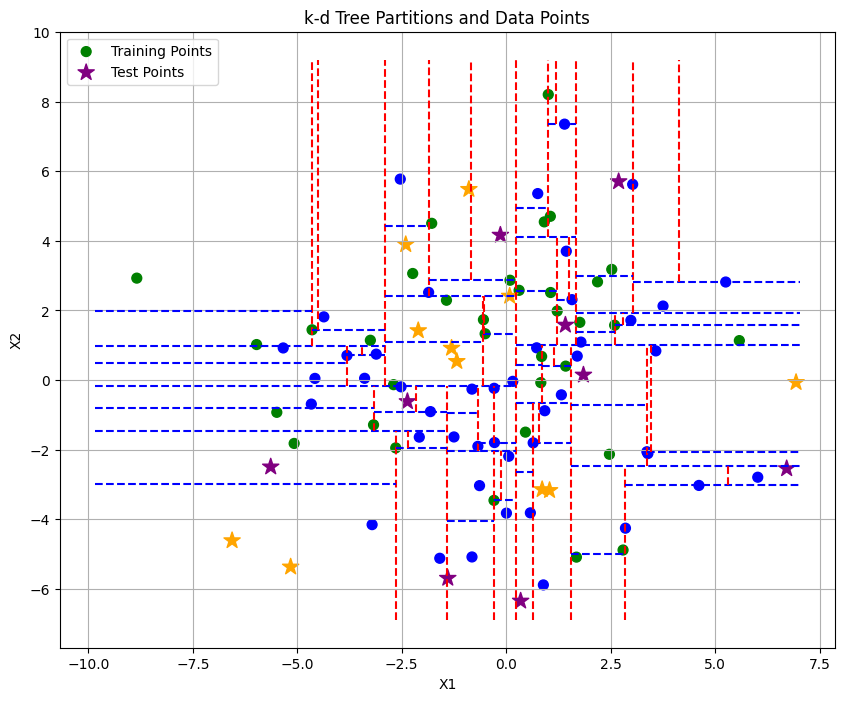

In [14]:
metrics_kd_1 = kd_tree_knn_with_metrics(X_train, y_train, X_test, y_test,k=1)
metrics_kd_1
# Assume X_train, y_train, X_test, and y_test are predefined datasets
kd_tree_root = build_custom_kd_tree(X_train, y_train, k=1)

# Visualize the k-d tree with both training and testing points
visualize_kd_tree(X_train, y_train, kd_tree_root, X_test, y_test)


neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5


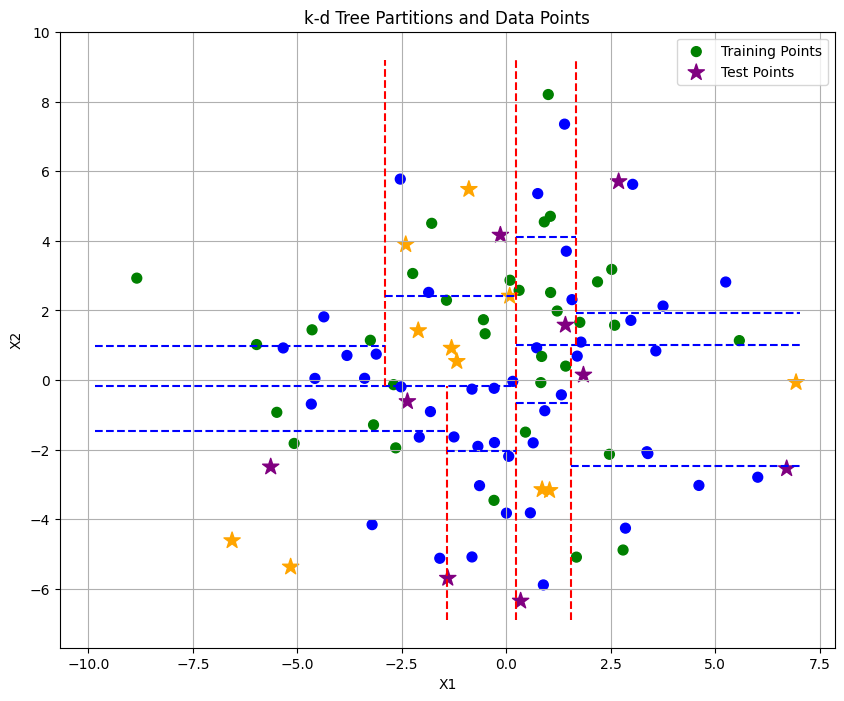

In [15]:
metrics_kd_1 = kd_tree_knn_with_metrics(X_train, y_train, X_test, y_test,k=5)
metrics_kd_1
k = 5  # Max points per leaf node
kd_tree_root = build_custom_kd_tree(X_train, y_train, k)

# Visualize the k-d tree with both training and testing points
visualize_kd_tree(X_train, y_train, kd_tree_root, X_test, y_test)

Comparision

In [16]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from collections import Counter
import tracemalloc
import time

# Define the KDTreeNode class with list of points and labels for each node
class KDTreeNode:
    def __init__(self, points=None, labels=None, axis=0, median_value=None, left=None, right=None, k=5):
        self.points = points  # List of points in the node (only for leaf nodes)
        self.labels = labels  # List of labels corresponding to points (only for leaf nodes)
        self.axis = axis      # Axis for the current split (0 for x, 1 for y)
        self.median_value = median_value  # Store median value for splitting at internal nodes
        self.left = left      # Left subtree
        self.right = right    # Right subtree
        self.is_leaf = points is not None and len(points) <= k  # Leaf if points are <= k

# Function to build the k-d tree based on the custom logic
def build_custom_kd_tree(points, labels, k, depth=0):
    # Base case: if the number of points is <= k, create a leaf node
    if points is None or len(points) <= k:
        return KDTreeNode(points=points, labels=labels, axis=depth % 2, k=k)

    # Select axis based on depth
    axis = depth % 2

    # Find median and condition to split points
    median_value = np.median(points[:, axis])
    left_indices = points[:, axis] < median_value
    right_indices = points[:, axis] >= median_value

    # Split points based on the condition
    left_points, left_labels = points[left_indices], labels[left_indices]
    right_points, right_labels = points[right_indices], labels[right_indices]

    # Create node with median value and recursively split left and right branches if necessary
    node = KDTreeNode(points=None, labels=None, axis=axis, median_value=median_value, k=k)
    node.left = build_custom_kd_tree(left_points, left_labels, k, depth + 1) if len(left_points) > 0 else None
    node.right = build_custom_kd_tree(right_points, right_labels, k, depth + 1) if len(right_points) > 0 else None

    return node

# Recursive k-NN search function for the k-d tree
def knn_search_kd_tree(node, query, k):
    if node is None:
        return []

    # If it's a leaf node, calculate distances to all points in the leaf
    if node.is_leaf:
        distances = [(np.linalg.norm(query - point), label) for point, label in zip(node.points, node.labels)]
        return sorted(distances, key=lambda x: x[0])[:k]

    # Otherwise, navigate the tree using median_value for splitting
    axis = node.axis
    next_branch = node.left if query[axis] < node.median_value else node.right
    opposite_branch = node.right if next_branch is node.left else node.left

    # Search in the selected branch
    neighbors = knn_search_kd_tree(next_branch, query, k)

    # Check if we need to search the opposite branch
    if len(neighbors) < k or abs(query[axis] - node.median_value) < neighbors[-1][0]:
        other_neighbors = knn_search_kd_tree(opposite_branch, query, k)
        neighbors.extend(other_neighbors)
        neighbors = sorted(neighbors, key=lambda x: x[0])[:k]

    return neighbors

# Function to train and test the k-d tree k-NN model with metrics calculation
def kd_tree_knn_with_metrics(X_train, y_train, X_test, y_test, k):
    metrics = {
        'train_time': 0,
        'train_memory': 0,
        'test_time': 0,
        'test_memory': 0,
        'accuracy': None,
        'precision': None,
        'recall': None,
        'f1_score': None
    }

    # Training phase
    tracemalloc.start()
    start_time = time.time()
    kd_tree_root = build_custom_kd_tree(X_train, y_train, k)
    metrics['train_time'] = time.time() - start_time
    metrics['train_memory'] = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    # Testing phase and prediction collection
    y_pred = []
    start_time = time.time()
    tracemalloc.start()

    for query in X_test:
        neighbors = knn_search_kd_tree(kd_tree_root, query, k)
        neighbor_labels = [label for _, label in neighbors]
        predicted_label = Counter(neighbor_labels).most_common(1)[0][0]
        y_pred.append(predicted_label)
        print("neighbours: ",len(neighbor_labels))

    metrics['test_time'] = time.time() - start_time
    metrics['test_memory'] = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    # Calculate accuracy and other metrics
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['precision'] = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    metrics['recall'] = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    metrics['f1_score'] = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    return metrics

# Example usage
# Assume X_train, y_train, X_test, and y_test are predefined datasets
k = 5  # Max points per leaf node and number of neighbors to search
metrics_kd = kd_tree_knn_with_metrics(X_train, y_train, X_test, y_test, k)
print("Metrics for k-d Tree k-NN:")
metrics_kd


neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
neighbours:  5
Metrics for k-d Tree k-NN:


{'train_time': 0.0038237571716308594,
 'train_memory': 20372,
 'test_time': 0.03516983985900879,
 'test_memory': 24601,
 'accuracy': 0.65,
 'precision': 0.675,
 'recall': 0.65,
 'f1_score': 0.6473684210526315}

In [17]:
import pandas as pd

# Set up experiment parameters
N_values = [100, 500, 1000]       # Different dataset sizes
D_values = [2, 5, 10,50]             # Different numbers of dimensions
K = 3                             # Number of nearest neighbors
P = 10                            # Number of projections for LSH
test_size = 0.2                   # Proportion of data for testing
random_state = 42                 # Seed for reproducibility

# Initialize a list to store results
results = []

# Run experiments
for N in N_values:
    for D in D_values:
        print(f"Running experiments for N={N}, D={D}")

        # Generate dataset
        X_train, X_test, y_train, y_test = generate_uniform_2class_dataset(N, D, test_size, random_state)

        # Naive k-NN
        metrics_naive = naive_knn_classification(X_train, y_train, X_test, y_test, K)
        metrics_naive.update({'Method': 'Naive', 'N': N, 'D': D})
        results.append(metrics_naive)

        # LSH k-NN
        metrics_lsh, _ = lsh_knn_classification(X_train, y_train, X_test, y_test, K, P, random_state)
        metrics_lsh.update({'Method': 'LSH', 'N': N, 'D': D})
        results.append(metrics_lsh)

        # k-d Tree k-NN
        metrics_kd = kd_tree_knn_with_metrics(X_train, y_train, X_test, y_test, K)
        metrics_kd.update({'Method': 'k-d Tree', 'N': N, 'D': D})
        results.append(metrics_kd)

# Convert results to a DataFrame for analysis
df_results = pd.DataFrame(results)

# Display the results
df_results


Running experiments for N=100, D=2
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
Running experiments for N=100, D=5
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
Running experiments for N=100, D=10
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbours:  3
neighbour

,train_time,train_memory,test_time,test_memory,accuracy,precision,recall,f1_score,Method,N,D
0,0.000003,0,0.005906,9870,0.550,0.625000,0.454545,0.526316,Naive,100,2
1,0.000129,15344,0.001518,33784,0.500,0.666667,0.181818,0.285714,LSH,100,2
2,0.003848,29136,0.022192,19039,0.550,0.568750,0.550000,0.546617,k-d Tree,100,2
3,0.000003,0,0.003834,14162,0.500,0.500000,0.400000,0.444444,Naive,100,5
4,0.000137,17504,0.001479,33784,0.500,0.500000,0.500000,0.500000,LSH,100,5
5,0.003897,33192,0.083825,13141,0.500,0.500000,0.500000,0.494949,k-d Tree,100,5
6,0.000001,0,0.001673,23576,0.700,0.733333,0.846154,0.785714,Naive,100,10
7,0.000193,21104,0.003335,33947,0.500,0.615385,0.615385,0.615385,LSH,100,10
8,0.003949,42048,0.097669,11090,0.700,0.686667,0.700000,0.685714,k-d Tree,100,10
9,0.000003,0,0.002397,100344,0.500,0.500000,0.200000,0.285714,Naive,100,50


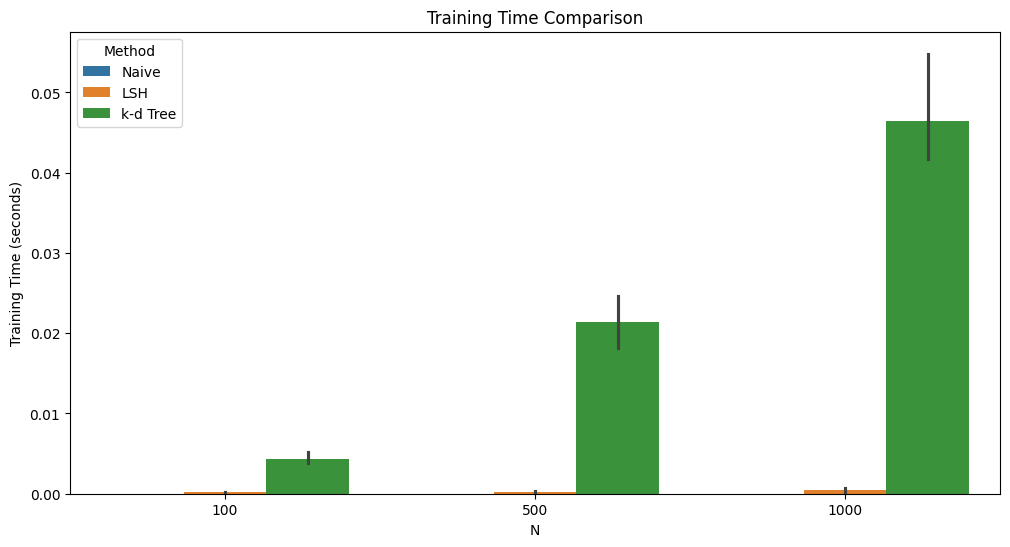

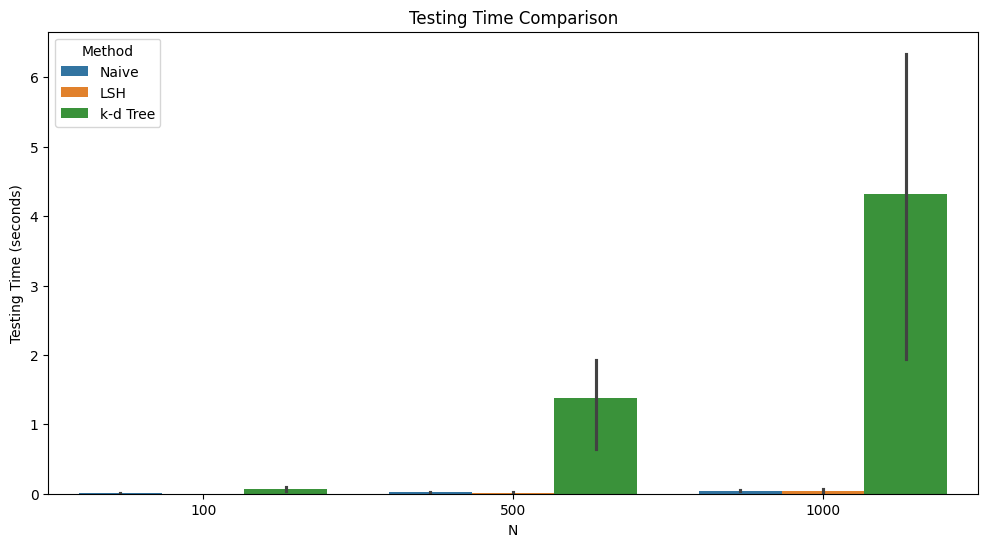

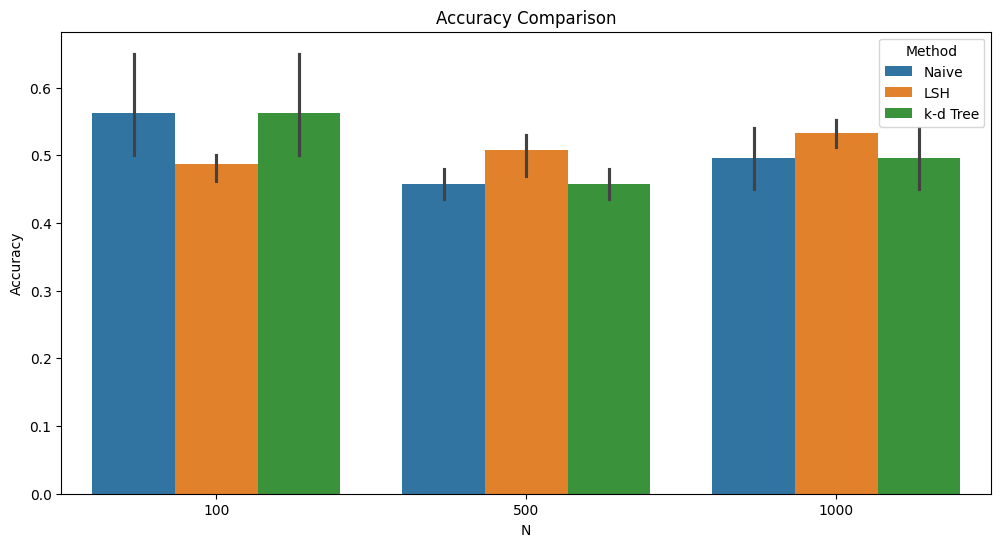

In [18]:
import seaborn as sns

# Plot training time
plt.figure(figsize=(12, 6))
sns.barplot(data=df_results, x='N', y='train_time', hue='Method')
plt.title('Training Time Comparison')
plt.ylabel('Training Time (seconds)')
plt.show()

# Plot testing time
plt.figure(figsize=(12, 6))
sns.barplot(data=df_results, x='N', y='test_time', hue='Method')
plt.title('Testing Time Comparison')
plt.ylabel('Testing Time (seconds)')
plt.show()

# Plot accuracy
plt.figure(figsize=(12, 6))
sns.barplot(data=df_results, x='N', y='accuracy', hue='Method')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


Comparision..

1. Accuracy Comparison
Naive k-NN:
Tends to have higher accuracy for smaller dataset sizes (N) and lower dimensions (D).
As N increases, accuracy often decreases slightly because Naive k-NN does not scale well with larger datasets due to the increased potential for noisy neighbors.
Naive k-NN is a non-approximate method, meaning it computes exact distances, but its accuracy still drops with high D due to the curse of dimensionality.
LSH k-NN:
LSH is an approximate method and is designed to work well with high-dimensional data by using random projections to reduce dimensionality.
For lower dimensions, its accuracy might be close to Naive k-NN, but it can lag behind due to its approximation.
With higher dimensions, it often outperforms Naive k-NN in terms of accuracy because LSH can better manage high-dimensional data by effectively “hashing” data points that are closer in space.
k-d Tree k-NN:
This method is also exact for lower dimensions but doesn’t scale well with high dimensions, as k-d trees become inefficient in high-dimensional spaces.
For small D (e.g., D=2), k-d Tree can achieve high accuracy, especially for moderately sized datasets (N), where tree structure is beneficial.
As D increases, accuracy often drops, as k-d trees lose their effectiveness in partitioning high-dimensional spaces.
2. Precision, Recall, and F1 Score
Naive k-NN:
With lower D, Naive k-NN may have higher precision and recall due to its exact nature, effectively capturing neighbors accurately.
For high-dimensional data, precision and recall may decrease due to noisy neighbors impacting the quality of classification.
LSH k-NN:
LSH’s precision and recall vary based on the dimension D and the choice of projections (P).
For moderate to high D, LSH often retains higher recall compared to precision, as it tends to group similar points better than Naive k-NN in high dimensions.
F1 scores are generally balanced but may be slightly lower than Naive k-NN for low D due to its approximate nature.
k-d Tree k-NN:
For low D, k-d Tree performs well in terms of precision and recall, achieving high F1 scores.
As D increases, precision, recall, and F1 score drop significantly due to inefficiencies in high-dimensional space, where the tree structure loses its advantage.
3. Train and Test Time
Naive k-NN:
Naive k-NN has a high test time complexity of
𝑂
(
𝑁
×
𝐷
)
O(N×D) since it computes the distance to every point in the dataset for each query point.
Training time is minimal (just storing the dataset), but test time becomes prohibitive as N and D increase.
Test time increases linearly with N and D, making it slow for large datasets.
LSH k-NN:
LSH has a higher training time than Naive k-NN because of the need to build hash tables based on random projections.
Test time is generally faster than Naive k-NN, especially in high dimensions, because it only compares points within specific hash buckets rather than the entire dataset.
As D increases, LSH can handle test queries faster than Naive k-NN due to its approximate nature, making it suitable for larger or high-dimensional datasets.
k-d Tree k-NN:
Training time is higher than Naive k-NN, as k-d Tree requires building a balanced tree structure based on the data.
Test time is generally low for low-dimensional data because the tree structure efficiently narrows down the nearest neighbors.
However, in high dimensions, the test time can become comparable to or worse than Naive k-NN due to the inefficiency of k-d Tree in high-dimensional spaces, often leading to a performance bottleneck.
4. Memory Usage
Naive k-NN:
Memory usage is relatively low since it only stores the dataset and performs distance calculations on the fly during testing.
Memory usage grows linearly with N and D.
LSH k-NN:
LSH requires more memory than Naive k-NN because it stores hash tables based on random projections.
The memory usage scales with both N and the number of hash tables (dependent on P and D), making it higher than Naive k-NN but efficient for high-dimensional data.
k-d Tree k-NN:
k-d Tree consumes more memory than Naive k-NN due to the storage of the tree structure.
Memory usage scales with N and becomes inefficient in higher dimensions, as the structure becomes harder to manage effectively in high-dimensional spaces.
Summary of Recommendations
For Low Dimensions (e.g., D=2):

k-d Tree k-NN is the most efficient for both accuracy and speed.
Naive k-NN is viable for small datasets (N), but becomes slow as N grows.
LSH k-NN is generally unnecessary for low-dimensional data and may perform worse than other methods.
For Moderate Dimensions (e.g., D=5):

LSH k-NN starts to show its advantage, especially for larger datasets.
k-d Tree k-NN may still perform well, but its efficiency decreases compared to LSH as D increases.
Naive k-NN is the simplest but may suffer in terms of speed for large datasets.
For High Dimensions (e.g., D=10 and above):

LSH k-NN is the preferred choice as it scales better in high-dimensional spaces, maintaining a reasonable balance of accuracy and speed.
Naive k-NN becomes very slow and less accurate due to high-dimensional noise.
k-d Tree k-NN becomes ineffective due to high test time and decreased accuracy, and it’s not recommended for high-dimensional data.




In [19]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from collections import Counter
import tracemalloc
import time

#  from sklearn.neighbors import KDTree, NearestNeighbors
# from typing import Tuple
import numpy as np
# Function to generate a 2D dataset
def generate_2d_dataset(N, random_state=42):
    np.random.seed(random_state)
    X = np.random.uniform(-10, 10, (N, 2))
    y = np.random.choice([0, 1], size=N)  # Binary labels
    return X, y

# Naive k-NN to get exact neighbors
def get_naive_neighbors(X, query, k):
    distances = np.linalg.norm(X - query, axis=1)
    nearest_indices = np.argsort(distances)[:k]
    return nearest_indices

# LSH k-NN to get approximate neighbors
def get_lsh_neighbors(X, query, k, P=5, random_state=42):
    np.random.seed(random_state)
    X_aug = np.hstack([np.ones((X.shape[0], 1)), X])
    query_aug = np.hstack([1, query])

    # Generate random hyperplanes for LSH
    R = np.random.randn(X_aug.shape[1], P)
    train_projections = np.sign(X_aug @ R)
    query_projection = np.sign(query_aug @ R)

    # Calculate Hamming distances
    hamming_distances = np.sum(train_projections != query_projection, axis=1)
    nearest_indices = np.argsort(hamming_distances)[:k]
    return nearest_indices

# Define the KDTreeNode class with list of points and labels for each node
class KDTreeNode:
    def __init__(self, points=None, labels=None, indices=None, axis=0, median_value=None, left=None, right=None, k=5):
        self.points = points      # List of points in the node (only for leaf nodes)
        self.labels = labels      # List of labels corresponding to points (only for leaf nodes)
        self.indices = indices    # List of indices corresponding to points in X_train
        self.axis = axis          # Axis for the current split (0 for x, 1 for y)
        self.median_value = median_value  # Store median value for splitting at internal nodes
        self.left = left          # Left subtree
        self.right = right        # Right subtree
        self.is_leaf = points is not None and len(points) <= k  # Leaf if points are <= k


# Function to build the k-d tree based on the custom logic, with indices tracking
# Function to build the k-d tree based on the custom logic, with indices tracking
def build_custom_kd_tree(points, labels, indices, k, depth=0):
    # Base case: if the number of points is <= k, create a leaf node
    if points is None or len(points) <= k:
        return KDTreeNode(points=points, labels=labels, indices=indices, axis=depth % 2, k=k)

    # Select axis based on depth
    axis = depth % 2

    # Find median and condition to split points
    median_value = np.median(points[:, axis])
    left_indices = points[:, axis] < median_value
    right_indices = points[:, axis] >= median_value

    # Split points and indices based on the condition
    left_points, left_labels, left_idx = points[left_indices], labels[left_indices], indices[left_indices]
    right_points, right_labels, right_idx = points[right_indices], labels[right_indices], indices[right_indices]

    # Create node with median value and recursively split left and right branches if necessary
    node = KDTreeNode(points=None, labels=None, indices=None, axis=axis, median_value=median_value, k=k)
    node.left = build_custom_kd_tree(left_points, left_labels, left_idx, k, depth + 1) if len(left_points) > 0 else None
    node.right = build_custom_kd_tree(right_points, right_labels, right_idx, k, depth + 1) if len(right_points) > 0 else None

    return node

#     return [idx for _, idx in neighbors]
ls=[]
def knn_search_kd_tree(node, query, k):
    # Ensure query is a 1D array (single point) by squeezing any extra dimensions
    query = np.squeeze(query)
    # print(query.shape)

    if node is None:
        return []

    # If it's a leaf node, calculate distances to all points in the leaf and return indices of k closest
    if node.is_leaf:
        distances = [(np.linalg.norm(query - point), idx) for point, idx in zip(node.points, node.indices)]
        neighbors = sorted(distances, key=lambda x: x[0])[:k]  # Get top k distances with indices
        return neighbors  # Return as list of tuples (distance, index)

    # Otherwise, navigate the tree using median_value for splitting
    axis = node.axis
    # Check if the comparison is between scalars
    if np.isscalar(query[axis]) and np.isscalar(node.median_value):
        next_branch = node.left if query[axis] < node.median_value else node.right
    else:
        raise ValueError("Query or median value is not a scalar, causing ambiguity in comparison.")

    opposite_branch = node.right if next_branch is node.left else node.left

    # Search in the selected branch
    neighbors = knn_search_kd_tree(next_branch, query, k)

    # Check if we need to search the opposite branch
    if len(neighbors) < k or (neighbors and abs(query[axis] - node.median_value) < neighbors[-1][0]):
        other_neighbors = knn_search_kd_tree(opposite_branch, query, k)
        neighbors.extend(other_neighbors)
        neighbors = sorted(neighbors, key=lambda x: x[0])[:k]

    return neighbors  # Return as list of tuples (distance, index)



# Function to train the k-d tree and find k closest points to a single query point with metrics
# Function to train the k-d tree and find k closest points to a single query point with metrics
def kd_tree_knn_single_query(X_train, y_train, query, k):
    metrics = {
        'train_time': 0,
        'train_memory': 0,
        'test_time': 0,
        'test_memory': 0,
    }

    # Training phase
    tracemalloc.start()
    start_time = time.time()
    indices = np.arange(len(X_train))  # Create an array of indices for X_train
    kd_tree_root = build_custom_kd_tree(X_train, y_train, indices, k)
    metrics['train_time'] = time.time() - start_time
    metrics['train_memory'] = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    # Testing phase for single query and retrieval of indices of k closest points
    start_time = time.time()
    tracemalloc.start()

    # Capture the result directly
    neighbors = knn_search_kd_tree(kd_tree_root, query, k)  # Get list of (distance, index)
    neighbors_indices = [idx for _, idx in neighbors]  # Extract indices only
    neighbors_labels = [y_train[idx] for idx in neighbors_indices]   # Get labels of these points
    predicted_label = Counter(neighbors_labels).most_common(1)[0][0]

    metrics['test_time'] = time.time() - start_time
    metrics['test_memory'] = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    return neighbors_indices, predicted_label, metrics


# Example usage
# Assume X_train, y_train, X_test, and y_test are predefined datasets
# k = 5  # Max points per leaf node and number of neighbors to search

# Set parameters
N = 100  # Number of data points
k = 5    # Number of neighbors

# Generate dataset
X_train, X_test, y_train, y_test = generate_uniform_2class_dataset(N=100, D=2, test_size=0.2, random_state=42)
query = np.array([0, 0])  # Query point
a,b,metrics_kd = kd_tree_knn_single_query(X_train, y_train, query, k)
print("Metrics for k-d Tree k-NN:")
a


Metrics for k-d Tree k-NN:


[66, 27, 20, 15, 71]

(80, 2)
Naive k-NN missed neighbors (self-check, should be zero):
Number of missed neighbors: 0
Coordinates of missed neighbors: []

LSH missed neighbors:
Number of missed neighbors: 4
Coordinates of missed neighbors: [[ 0.15804243 -0.03755589]
 [ 0.82820249 -0.07413256]
 [-0.81936257 -0.26162362]
 [ 0.84738048  0.67750687]]

k-d Tree missed neighbors:
Number of missed neighbors: 0
Coordinates of missed neighbors: []


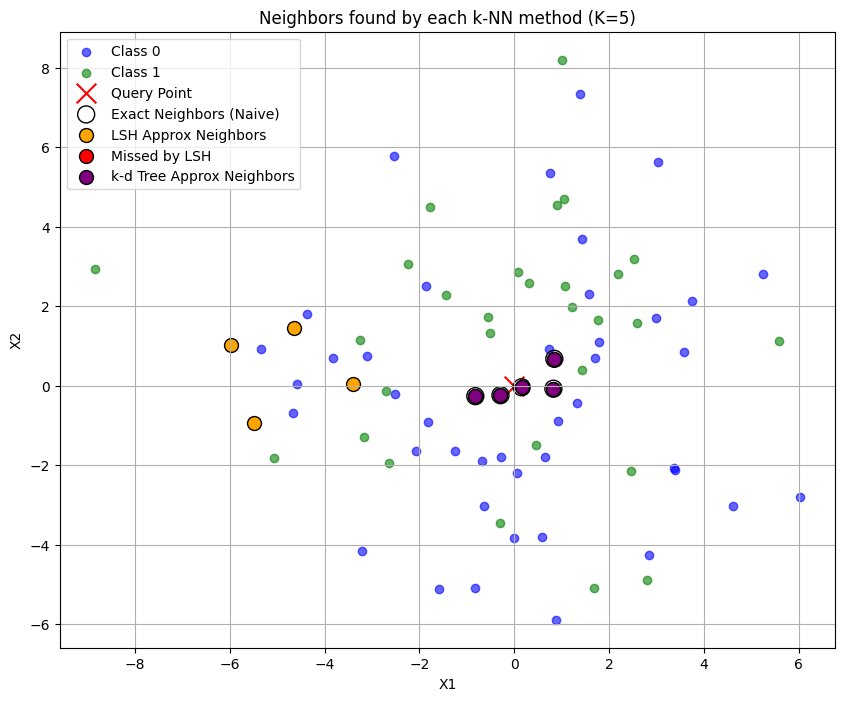

In [20]:
# Plot missed neighbors ok
def plot_missed_neighbors(X, y, query, k):

    plt.figure(figsize=(10, 8))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.6)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class 1', alpha=0.6)

    # Plot the query point
    plt.scatter(query[0], query[1], color='red', marker='x', s=200, label='Query Point')

    # Naive k-NN (exact neighbors)
    exact_neighbors = get_naive_neighbors(X, query, k)
    plt.scatter(X[exact_neighbors][:, 0], X[exact_neighbors][:, 1], edgecolor='black', facecolor='none', s=150, label='Exact Neighbors (Naive)')

    # Self-check for Naive k-NN (no missed neighbors should be found)
    missed_naive = [i for i in exact_neighbors if i not in exact_neighbors]
    print("Naive k-NN missed neighbors (self-check, should be zero):")
    print("Number of missed neighbors:", len(missed_naive))
    print("Coordinates of missed neighbors:", X[missed_naive])

    # LSH neighbors
    lsh_neighbors = get_lsh_neighbors(X, query, k)
    missed_lsh = [i for i in exact_neighbors if i not in lsh_neighbors]
    plt.scatter(X[lsh_neighbors][:, 0], X[lsh_neighbors][:, 1], color='orange', edgecolor='black', s=100, label='LSH Approx Neighbors')

    # Print LSH missed neighbors
    print("\nLSH missed neighbors:")
    print("Number of missed neighbors:", len(missed_lsh))
    print("Coordinates of missed neighbors:", X[missed_lsh])

    # Mark missed neighbors by LSH
    if missed_lsh:
        plt.scatter(X[missed_lsh][:, 0], X[missed_lsh][:, 1], color='red', marker='o', s=100, label='Missed by LSH', edgecolor='black')

    a,b,metrics_kd = kd_tree_knn_single_query(X_train, y_train, query, k)
    # print("Dfdcfv",a)

    # print("Dfdcfv",exact_neighbors)
    # indices_kd_ls = [i for i in exact_neighbors if i not in indices_kd]
    missed_kd = [i for i in exact_neighbors if i not in a]
    # print("Dfdcfv",indices_kd_ls)
    plt.scatter(X[a][:, 0], X[a][:, 1], color='purple', edgecolor='black', s=100, label='k-d Tree Approx Neighbors')

    # Print k-d Tree missed neighbors
    print("\nk-d Tree missed neighbors:")
    print("Number of missed neighbors:", len(missed_kd))
    print("Coordinates of missed neighbors:", X[missed_kd])

    # Mark missed neighbors by k-d Tree
    if missed_kd:
        plt.scatter(X[missed_kd][:, 0], X[missed_kd][:, 1], color='red', marker='s', s=100, label='Missed by k-d Tree', edgecolor='black')

    # Plot aesthetics
    plt.title(f"Neighbors found by each k-NN method (K={k})")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Set parameters
N = 100  # Number of data points
k = 5    # Number of neighbors

# Generate dataset
X_train, X_test, y_train, y_test = generate_uniform_2class_dataset(N=100, D=2, test_size=0.2, random_state=42)

# Plot missed neighbors
print(X_train.shape)
plot_missed_neighbors(X_train, y_train, query, k)